In [1]:
import numpy as np
import pandas as pd 
import ipaddress
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_columns', None)

In [2]:
fraud_data = pd.read_csv(r"C:\Users\ephre\Documents\Fraud-Detection-for-E-Commerce-and-Banking-Transactions---AI-Solutions\Data\Raw_Data\Fraud_Data.csv")

In [3]:
fraud_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [4]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


In [5]:
fraud_data.describe()

,user_id,purchase_value,age,ip_address,class
count,151112.000000,151112.000000,151112.000000,1.511120e+05,151112.000000
mean,200171.040970,36.935372,33.140704,2.152145e+09,0.093646
std,115369.285024,18.322762,8.617733,1.248497e+09,0.291336
min,2.000000,9.000000,18.000000,5.209350e+04,0.000000
25%,100642.500000,22.000000,27.000000,1.085934e+09,0.000000
50%,199958.000000,35.000000,33.000000,2.154770e+09,0.000000
75%,300054.000000,49.000000,39.000000,3.243258e+09,0.000000
max,400000.000000,154.000000,76.000000,4.294850e+09,1.000000


In [6]:
fraud_data.isnull().sum()

user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64

In [7]:
fraud_data.drop_duplicates(inplace=True)

In [8]:
# Convert column to datetime format
fraud_data['purchase_time'] = pd.to_datetime(fraud_data['purchase_time'])

# Convert column to datetime format
fraud_data['signup_time'] = pd.to_datetime(fraud_data['signup_time'])

# Convert data types as necessary
fraud_data['purchase_value'] = fraud_data['purchase_value'].astype(float)


In [9]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   user_id         151112 non-null  int64         
 1   signup_time     151112 non-null  datetime64[ns]
 2   purchase_time   151112 non-null  datetime64[ns]
 3   purchase_value  151112 non-null  float64       
 4   device_id       151112 non-null  object        
 5   source          151112 non-null  object        
 6   browser         151112 non-null  object        
 7   sex             151112 non-null  object        
 8   age             151112 non-null  int64         
 9   ip_address      151112 non-null  float64       
 10  class           151112 non-null  int64         
dtypes: datetime64[ns](2), float64(2), int64(3), object(4)
memory usage: 12.7+ MB


<Axes: >

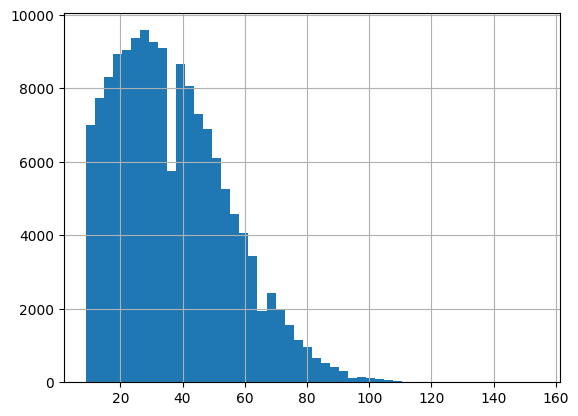

In [10]:
# Univariate analysis - histogram for purchase_value
fraud_data['purchase_value'].hist(bins=50)


<Axes: xlabel='purchase_time', ylabel='purchase_value'>

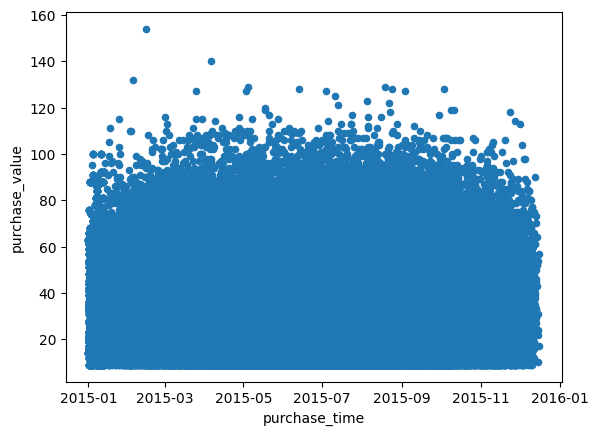

In [11]:
# Bivariate analysis - scatter plot between purchase_value and time
fraud_data.plot.scatter(x='purchase_time', y='purchase_value')

<Axes: xlabel='signup_time', ylabel='purchase_value'>

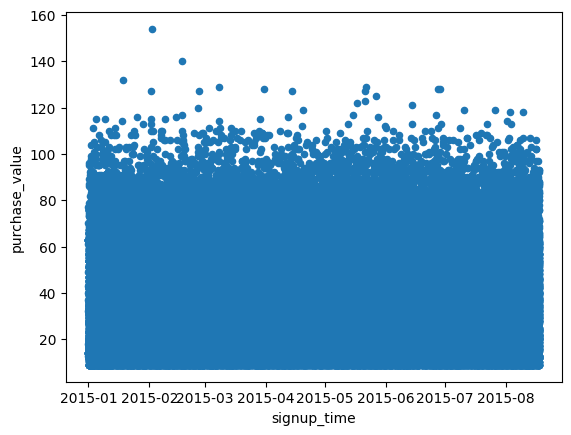

In [12]:
fraud_data.plot.scatter(x='signup_time', y='purchase_value')

In [13]:
# Create hour of day and day of week features
fraud_data['hour_of_day'] = fraud_data['purchase_time'].dt.hour
fraud_data['day_of_week'] = fraud_data['purchase_time'].dt.dayofweek


In [15]:
# Convert to datetime and extract useful features
fraud_data['signup_time'] = pd.to_datetime(fraud_data['signup_time'])
fraud_data['purchase_time'] = pd.to_datetime(fraud_data['purchase_time'])

fraud_data['signup_month'] = fraud_data['signup_time'].dt.month
fraud_data['signup_day'] = fraud_data['signup_time'].dt.day
fraud_data['signup_hour'] = fraud_data['signup_time'].dt.hour

fraud_data['purchase_month'] = fraud_data['purchase_time'].dt.month
fraud_data['purchase_day'] = fraud_data['purchase_time'].dt.day
fraud_data['purchase_hour'] = fraud_data['purchase_time'].dt.hour


In [16]:
fraud_data

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,hour_of_day,day_of_week,signup_month,signup_day,signup_hour,purchase_month,purchase_day,purchase_hour
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34.0,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,2,5,2,24,22,4,18,2
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16.0,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,1,0,6,7,20,6,8,1
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15.0,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,18,3,1,1,18,1,1,18
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44.0,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,13,0,4,28,21,5,4,13
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39.0,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,18,2,7,21,7,9,9,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43.0,XPSKTWGPWINLR,SEO,Chrome,M,28,3.451155e+09,1,0,6,1,27,3,3,29,0
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35.0,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0,12,1,5,15,17,5,26,12
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40.0,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0,7,2,3,3,23,5,20,7
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46.0,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3.601175e+09,0,9,0,7,9,20,9,7,9


In [17]:
file_path = r"C:/Users/ephre/Documents/Fraud-Detection-for-E-Commerce-and-Banking-Transactions---AI-Solutions/Data/Cleaned_Data/fraud_cleaned_Data.csv"

fraud_data.to_csv(file_path, index=False)